In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

from sklearn import preprocessing
import scoring as score # para hacer los reportes de puntajes
from time import time

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import scoring as score # para hacer los reportes de puntajes

properati = pd.read_csv('datos/properati_final.csv')

<IPython.core.display.Javascript object>

In [2]:
#paso features con strings a numericos
le_barrio = preprocessing.LabelEncoder()
barrios=properati['state_name']
le_barrio.fit(barrios)
properati['state_name'] = le_barrio.transform(barrios)

le_zona = preprocessing.LabelEncoder()
zona=properati['place_name']
le_zona.fit(zona)
properati['place_name'] = le_zona.transform(zona)

le_tipo = preprocessing.LabelEncoder()
tipos_prop=properati['property_type']
le_tipo.fit(tipos_prop)
properati['property_type'] = le_tipo.transform(tipos_prop)



In [3]:
cant_buckets = 200

#buckets
cantidad,rango = np.histogram(properati['price_aprox_usd'], bins=cant_buckets)
properati['categories_by_price']=pd.cut(properati['price_aprox_usd'],rango,labels=np.arange(cant_buckets),include_lowest=True)
#lo casteo a float porque si no tira error 
properati['categories_by_price']=properati['categories_by_price'].astype(np.float64) 
properati.groupby('categories_by_price').count().sort_values("lat",ascending=True)

,created_on,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,fecha,superficie_descubierta
categories_by_price,,,,,,,,,,,,,,,,,,,,,
199.0,1,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,1,1,1,0
16.0,5,5,5,5,5,0,0,5,5,5,...,5,5,0,0,0,5,5,5,5,4
43.0,1,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,1,1,1,1
33.0,3,3,3,3,3,1,1,3,3,3,...,3,3,0,0,1,3,3,3,3,1
28.0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,0
27.0,2,2,2,2,2,1,1,2,2,2,...,2,2,0,1,1,2,2,2,2,1
47.0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,0
20.0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
18.0,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,0


In [ ]:
Z= zip(properati['surface_total_in_m2'],\
        properati['surface_covered_in_m2'],properati["property_type"],properati['state_name'],properati['place_name'],properati["categories_by_price"])

In [ ]:
outs = IsolationForest(n_jobs=-1,n_estimators=50)
outs.fit(Z)

In [ ]:
nuevo_aux =zip(X,outs.predict(Z)) 

In [ ]:
nuevo=[tupla for tupla in nuevo_aux if tupla[1]==1] #solo necesito lo que devuelve predecir Z y no el Z en si
print len(nuevo)
nuevo=[tupla[0] for tupla in nuevo_aux]
X=nuevo

In [4]:
'''#preparo set de datos
X = zip(properati['surface_total_in_m2'],\
        properati['surface_covered_in_m2'],properati["property_type"],properati['state_name'],properati['place_name'])
y = properati["categories_by_price"]'''

# GBoost

In [21]:
%%notify

gb= ExtraTreesClassifier(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

n_estimators=np.arange(10,100,10)

param_grid = {"n_estimators": n_estimators}

search = RandomizedSearchCV(gb, param_distributions=param_grid ,cv=5,n_iter=2) 
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 41.88 segundos para 2 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.977 (std: 0.000)
Promedio validation score: 0.856 (std: 0.002)
Promedio fit time: 2.742s
Hiper-parametros: {'n_estimators': 50}

Puesto: 2
Promedio training score: 0.977 (std: 0.000)
Promedio validation score: 0.853 (std: 0.001)
Promedio fit time: 0.796s
Hiper-parametros: {'n_estimators': 10}



<IPython.core.display.Javascript object>

In [ ]:
%%notify

xgb= XGBRegressor(nthread=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

learning_rate=np.arange(0.3,0.9,0.2)

param_grid = {"learning_rate": learning_rate,'min_child_weight':[1,3],'gamma':[i/10.0 for i in range(1,9)],'subsample':[i/10.0 for i in range(6,8)]}

search1 = GridSearchCV(xgb, param_grid=param_grid ,cv=5) 
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

In [22]:
mejor1 = search.best_estimator_

# RF

In [23]:
%%notify

rf = RandomForestClassifier(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

criterion = ['gini','entropy']
max_features =["auto","log2",None]
n_estimators = np.arange(40,100,5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"criterion": criterion,"max_features":max_features,"n_estimators":n_estimators}

search = RandomizedSearchCV(rf, param_distributions=param_grid ,cv=5,n_iter=2) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 84.52 segundos para 2 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.976 (std: 0.000)
Promedio validation score: 0.855 (std: 0.003)
Promedio fit time: 2.457s
Hiper-parametros: {'n_estimators': 40, 'max_features': 'auto', 'criterion': 'gini'}

Puesto: 2
Promedio training score: 0.977 (std: 0.000)
Promedio validation score: 0.853 (std: 0.002)
Promedio fit time: 8.585s
Hiper-parametros: {'n_estimators': 65, 'max_features': None, 'criterion': 'entropy'}



<IPython.core.display.Javascript object>

In [ ]:
%%notify

rf = RandomForestClassifier(n_jobs=-1)

criterion = ['gini','entropy']
max_features =["auto","log2",None]
n_estimators = np.arange(40,100,5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"criterion": criterion,"max_features":max_features,"n_estimators":n_estimators}

search = GridSearchCV(rf, param_distributions=param_grid ,cv=5,n_iter=10) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

In [24]:
mejor2= search.best_estimator_
print mejor2.feature_importances_

[ 0.29573746  0.40950051  0.06727833  0.04097368  0.18651002]


In [9]:
search.score(X_test,y_test)

0.86392637136990325

# ETC

# MLP

In [56]:
from sklearn.neural_network import MLPClassifier

In [59]:
%%notify

mlp = MLPClassifier()

activation = ["identity", "logistic", "tanh", "relu"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"activation": activation}

search = GridSearchCV(mlp, param_grid=param_grid ,cv=5,n_jobs=-1) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)

GridSearchCV duro 687.68 segundos para 4 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.796 (std: 0.004)
Promedio validation score: 0.794 (std: 0.003)
Promedio fit time: 149.860s
Hiper-parametros: {'activation': 'logistic'}

Puesto: 2
Promedio training score: 0.786 (std: 0.005)
Promedio validation score: 0.784 (std: 0.005)
Promedio fit time: 90.187s
Hiper-parametros: {'activation': 'tanh'}

Puesto: 3
Promedio training score: 0.749 (std: 0.015)
Promedio validation score: 0.749 (std: 0.016)
Promedio fit time: 28.650s
Hiper-parametros: {'activation': 'relu'}

Puesto: 4
Promedio training score: 0.736 (std: 0.010)
Promedio validation score: 0.736 (std: 0.010)
Promedio fit time: 27.021s
Hiper-parametros: {'activation': 'identity'}



<IPython.core.display.Javascript object>

In [60]:
mlp=search.best_estimator_

In [61]:
search.score(X_test,y_test)

0.79543121149897333

# Lineales

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
%%notify

lr = LinearRegression(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.17121211343342224

<IPython.core.display.Javascript object>

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
%%notify

logr = LogisticRegression(n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

logr.fit(X_train, y_train)
logr.score(X_test,y_test)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.75022000586682314

<IPython.core.display.Javascript object>

# Ensamble_

In [74]:
voting = VotingClassifier(estimators=[('mejor1', mejor1), ('mejor2', mejor2)],voting="hard")

In [75]:
%%notify
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mejor1', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_wei..._jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

<IPython.core.display.Javascript object>

In [76]:
voting.score(X_test,y_test)

0.86546641243766498

In [77]:
errores = voting.predict(X_test)-y_test
print ("Error maximo:{0}\nError minimo:{1}".format( max(abs(errores)),min(abs(errores))))
print(errores)

Error maximo:39.0
Error minimo:0.0
124556    0.0
4843      0.0
129724    0.0
86843     0.0
17487     0.0
129953    0.0
61963    -1.0
113874    0.0
131113    0.0
100       0.0
79518     0.0
21635     0.0
106489    0.0
101318    0.0
33521     1.0
11537     0.0
24871     0.0
125797    0.0
130628    0.0
107344    0.0
35632     0.0
25178     0.0
95741    -1.0
64224     0.0
5838      0.0
111019    0.0
76221     0.0
30495     0.0
132735    0.0
11914     0.0
         ... 
38607    -2.0
86522     0.0
81514     0.0
79544     0.0
56912     0.0
24490     0.0
12148     0.0
68562     0.0
99063     0.0
84431     0.0
69726     0.0
51042     1.0
4216      0.0
84693     0.0
2708      0.0
63371     0.0
61847     0.0
57569     0.0
115103    0.0
12855     0.0
100317    0.0
107714    0.0
57074     0.0
28295     0.0
79045     0.0
35236    -1.0
11539     0.0
33050     0.0
87771     0.0
14274    -1.0
Name: categories_by_price, Length: 27272, dtype: float64


In [78]:
count_max=0
max_error=1
lista=[]
for error in errores:
    if abs(error)>max_error:
        count_max+=1
        lista.append(abs(error))
print ("Hay {0} de {1} que tienen mas de {2} clases de error ({3}%)".format(count_max,len(errores),max_error,100 * count_max/len(errores)))

Hay 563 de 27272 que tienen mas de 1 clases de error (2%)


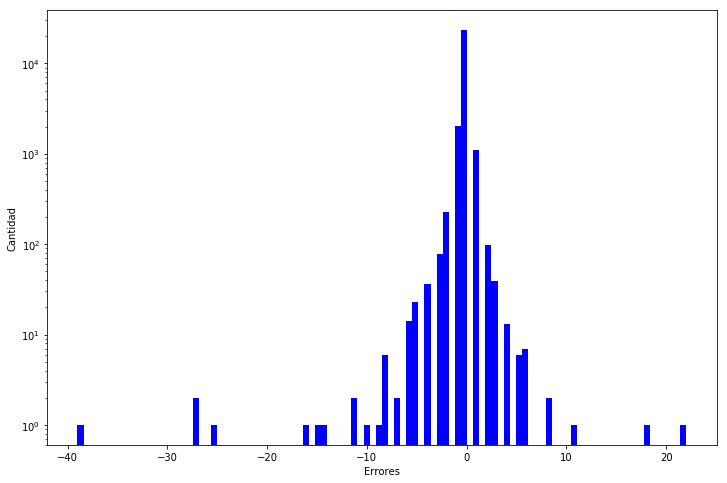

In [79]:
# the histogram of the data
plt.figure(figsize=(12,8))
plt.hist(errores, 100, facecolor='blue')
plt.xlabel('Errores')
plt.ylabel('Cantidad')
#plt.xlim(-10000000, 10000000) #para variar el "zoom a 0"
plt.yscale('log')
plt.show()